# Loan Data Exploration
## by Zhen
## Table of Contents

<ul>
<li><a href="#intro">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#eda">Bivariate Exploration</a></li>
<li><a href="#Multivariate">Multivariate Exploration</a></li>    
</ul>

<a id='intro'></a>
## Preliminary Wrangling

>In this project, we will explore a data set from Prosper which containing more than 100,000 loans, including loan amount, borrower rate, credit grade and many other variables.

### Gather & Assess

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

First, Load in the dataset and have a quick high-level overview of data shape and composition.

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [4]:
loan.shape

(113937, 81)

In [5]:
for col in loan.columns: 
    print(col) 

ListingKey
ListingNumber
ListingCreationDate
CreditGrade
Term
LoanStatus
ClosedDate
BorrowerAPR
BorrowerRate
LenderYield
EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn
ProsperRating (numeric)
ProsperRating (Alpha)
ProsperScore
ListingCategory (numeric)
BorrowerState
Occupation
EmploymentStatus
EmploymentStatusDuration
IsBorrowerHomeowner
CurrentlyInGroup
GroupKey
DateCreditPulled
CreditScoreRangeLower
CreditScoreRangeUpper
FirstRecordedCreditLine
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
OpenRevolvingAccounts
OpenRevolvingMonthlyPayment
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
IncomeRange
IncomeVerifiable
StatedMonthlyIncome
LoanKey
TotalProsperLoans
TotalProsperPaymentsBilled
OnTimeProsperPayments
P

<br />
As we can see, there are too many variables in this dataset.    

Therefore after went through the definitions of all the variables with the help of [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0), I selected 12 variables that I am more interested in: ListingNumber, ListingCreationDate, CreditGrade (pre-July 2009), LoanOriginalAmount, LoanStatus, BorrowerRate, ProsperRatingAlpha (post-July 2009), ListingCategory, BorrowerState, Occupation, EmploymentStatus, AmountDelinquent and IncomeRange.

In [6]:
variables = ['ListingNumber','ListingCreationDate','CreditGrade','LoanOriginalAmount','LoanStatus','BorrowerRate','ProsperRating (Alpha)','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IncomeRange']
loan = loan[variables]

In [7]:
loan.head(3)

,ListingNumber,ListingCreationDate,CreditGrade,LoanOriginalAmount,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,193129,2007-08-26 19:09:29.263000000,C,9425,Completed,0.158,NaN,0,CO,Other,Self-employed,"$25,000-49,999"
1,1209647,2014-02-27 08:28:07.900000000,NaN,10000,Current,0.092,A,2,CO,Professional,Employed,"$50,000-74,999"
2,81716,2007-01-05 15:00:47.090000000,HR,3001,Completed,0.275,NaN,0,GA,Other,Not available,Not displayed


In [8]:
loan.dtypes,loan.shape

(ListingNumber                  int64
 ListingCreationDate           object
 CreditGrade                   object
 LoanOriginalAmount             int64
 LoanStatus                    object
 BorrowerRate                 float64
 ProsperRating (Alpha)         object
 ListingCategory (numeric)      int64
 BorrowerState                 object
 Occupation                    object
 EmploymentStatus              object
 IncomeRange                   object
 dtype: object, (113937, 12))

As _ListingNumber_ is the number that 'uniquely identifies the listing to the public as displayed on the websitet', let's check if we have duplicated data in the dataframe.

In [9]:
loan.ListingNumber.duplicated().sum()

871

In [10]:
type(loan.ListingCreationDate[0])

str

### clean
- There are 871 duplicated ListingNumbers which means duplicated records. Drop the duplicated records.
- Change the type of ListingCreationDate from string to datetime.
- convert CreditGrade and ProsperRating into ordered categorical types

1. Drop the duplicated records.

In [11]:
loan_clean = loan.copy()

In [12]:
loan_clean.drop_duplicates(subset='ListingNumber', inplace = True)

In [13]:
print(loan_clean.shape)
print()
print(loan_clean.ListingNumber.duplicated().sum())

(113066, 12)

0


2. Data type: _ListingCreationDate_ string to datatime

In [14]:
loan_clean.ListingCreationDate = pd.to_datetime(loan_clean.ListingCreationDate)

In [15]:
type(loan_clean.ListingCreationDate[0])

pandas._libs.tslibs.timestamps.Timestamp

3. Convert CreditGrade and ProsperRating into ordered categorical types  

!!0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 -    A, 7 - AA._

In [16]:
ordinal_var_dict = {'CreditGrade': ['HR','E','D','C','B','A','AA'],
                    'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_clean[var] = loan_clean[var].astype(ordered_var)

### What is the structure of your dataset?

- The original data set (Last updated 03/11/2014) contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.   


- From all those variables, I selected 12 of them that I am most interested in:   
ListingNumber, ListingCreationDate, CreditGrade (pre-July 2009), ProsperRatingAlpha (post-July 2009), LoanOriginalAmount, LoanStatus, BorrowerRate, ListingCategory, BorrowerState, Occupation, EmploymentStatus and IncomeRange.   


- CreditGrade and ProsperRatingAlpha are ordered factor variables with the following levels:<br>
    (worst) ——> (best) <br>
    N/A, HR, E, D, C, B, A, AA  
     
### What is/are the main feature(s) of interest in your dataset?

- The features of the borrowers
- The features of the loans
- What affects the borrower rate?
- How does borrower’s ProsperRating/CreditGrade affect the LoanOriginalAmount,BorrowerRate and Result?
- How does CreditGrade affect the loan’s outcome status?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest? 

- CreditGrade/ProsperRating  
  1.LoanOriginalAmount<br>
  2.BorrowerRate<br> 
  3.OutcomeStatus<br>
<br>  
- BorrowerRate  
  1.CreditGrade/ProsperRating<br>
  2.LoanOriginalAmount<br>
<br>    
- main feature & different period of time

<a id='univariate'></a>
## Univariate Exploration

I'll start by getting to know more about the borrowers and loans on Prosper: 
- Borrowers: CreditGrade/ProsperRatingAlpha, BorrowerState, Occupation, EmploymentStatus and IncomeRange.
- Loans: LoanOriginalAmount, Term, LoanStatus, BorrowerRate and ListingCategory.

In [17]:
loan_clean['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [18]:
loan_clean.head(2)

,ListingNumber,ListingCreationDate,CreditGrade,LoanOriginalAmount,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,193129,2007-08-26 19:09:29.263,C,9425,Completed,0.158,NaN,0,CO,Other,Self-employed,"$25,000-49,999"
1,1209647,2014-02-27 08:28:07.900,NaN,10000,Current,0.092,A,2,CO,Professional,Employed,"$50,000-74,999"


### Borrowers

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
Name: CreditGrade, dtype: int64
C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64


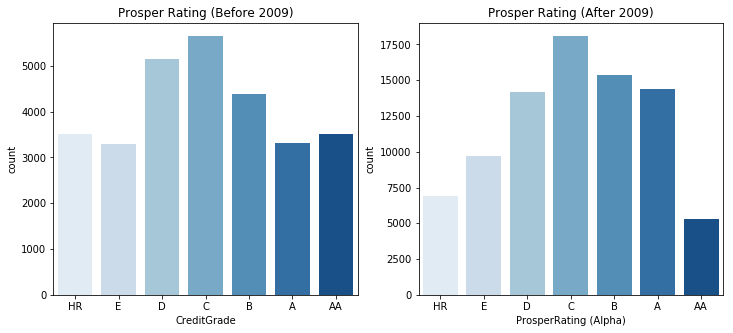

In [19]:
# filter the time by adding a new column _'month_year'_
loan_clean['month_year'] = pd.to_datetime(loan_clean['ListingCreationDate']).dt.to_period('M')
before = loan_clean[loan_clean.month_year < '2009-07']
after = loan_clean[loan_clean.month_year >= '2009-07']

# First have a look of the counts of CreditGrade/ProsperRating through the barchart.
print(before.CreditGrade.value_counts()), print(after['ProsperRating (Alpha)'].value_counts())

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sb.countplot(data = before, x = 'CreditGrade', palette = 'Blues');
plt.title('Prosper Rating (Before 2009)');

plt.subplot(1,2,2)
sb.countplot(data = after, x = 'ProsperRating (Alpha)', palette = 'Blues');
plt.title('Prosper Rating (After 2009)');

Before 2009, the Prosper Rating was concentrated between D to B, most of them were in the middle level, while the highest rating(AA) also has a strong proportion. However (nowadays) after 2009, though the middle-level rates still got a pretty high proportion, the AA rate is very low, which may also mean that the standard now is really strict to get a AA. Probably indicates AA may have a strong contribution to the borrowing rate or amount. 

In [20]:
# now let's have a look at their address.
loan_clean.BorrowerState.value_counts()

CA    14594
TX     6786
FL     6667
NY     6660
IL     5872
GA     4976
OH     4164
MI     3568
VA     3251
NC     3067
NJ     3062
WA     3026
PA     2950
MD     2794
MO     2598
MN     2308
MA     2222
CO     2189
IN     2069
AZ     1882
WI     1827
OR     1806
TN     1727
AL     1668
CT     1613
SC     1109
NV     1078
KS     1052
KY      974
OK      966
LA      942
UT      873
AR      851
MS      783
NE      664
ID      589
NH      546
NM      469
RI      432
HI      407
WV      386
DC      379
MT      328
DE      299
VT      205
AK      199
IA      186
SD      185
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

**As can be seen above, there are too many states included. I will choose the states that have more than 2000 records.**

In [21]:
states = loan_clean.BorrowerState.value_counts()[loan_clean.BorrowerState.value_counts() > 2000].index

In [22]:
sub_loan_clean = loan_clean[loan_clean['BorrowerState'].isin(states)]

In [23]:
base_color = sb.color_palette()[4]
base_count = sub_loan_clean.BorrowerState.value_counts()
base_order = sub_loan_clean.BorrowerState.value_counts().index

In [24]:
total = loan_clean.shape[0]
biggest = sub_loan_clean.BorrowerState.value_counts()[0]
big = biggest/total

In [25]:
tick_props = np.arange(0,big,0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

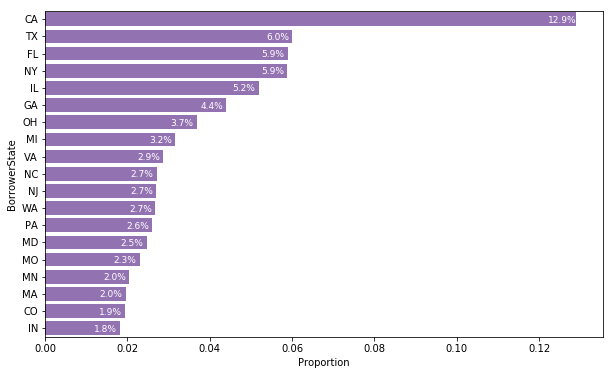

In [26]:
plt.figure(figsize=[10,6])
sb.countplot(data = sub_loan_clean, y = 'BorrowerState', color = base_color, order = base_order)
plt.xticks(tick_props*total, tick_names)
plt.xlabel('Proportion')
locs,labels = plt.yticks();

for loc, label in zip(locs,labels):
    count = base_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/total)
    plt.text(count-400, loc+0.2, string, ha ="center", color = 'w', fontsize = 9);

There are 12.9% of the loan records came from California(CA) which is much higher than the rest of the states.  
The other top 5 states are Texas(TX), (Florida)FL, (New York)NY and (Illinois)IL.

In [27]:
# Now have a quick look of the EmploymentStatus and IncomeRange of the borrowers.
loan_clean.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [28]:
loan_clean.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

Employment status: most of the borrowers are employed and have a full-time job.
Income range: People who have a low-middle range income ( $25,000-49,999/50,000-74,999 ) are more likely to loan and also more likely to get the loan. We will check if the income affects the borrowing rate later.  

One thing surprises me is that there are more than 800 people who are not employed and 621 people who don't have income still got the loan. I want to have a further check of their borrow rate, borrow rating as well as their outcome status.

In [29]:
# Just curious, peple with what occupation are loaning here. 
loan_clean.Occupation.value_counts()[0:5]

Other                  28422
Professional           13531
Computer Programmer     4442
Executive               4280
Teacher                 3729
Name: Occupation, dtype: int64

The top three occupation are Computer Programmer, executive and teacher! Computer Programmers are probably willing to start their own tech company haha! 

### Loans

In [30]:
loan_clean['LoanOriginalAmount'].describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

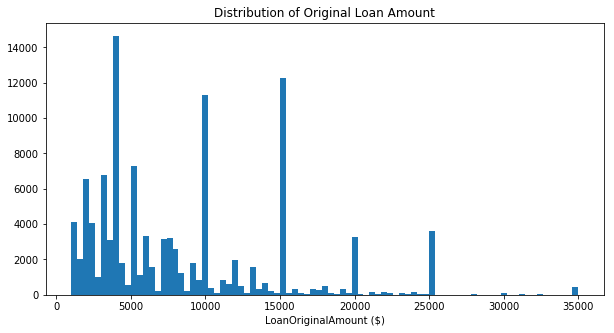

In [31]:
# First let's check the distribution of the original loan amount.
plt.figure(figsize=[10,5])

binsize = 400
bins = np.arange(1000, loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.hist(data = loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.title('Distribution of Original Loan Amount');

As is shown from the histogram above, the distribution of loan amount has lots of peaks which are concentrated near 5000, 10000, 15000, 20000, 25000, 30000 and 35000. And the interesting part is every time before those peaks there is a steep-jump instead of a smooth ramp-up which means people intend to borrow(get) the integer amount of loans especially when it's a large number.

In [32]:
loan_clean['BorrowerRate'].describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

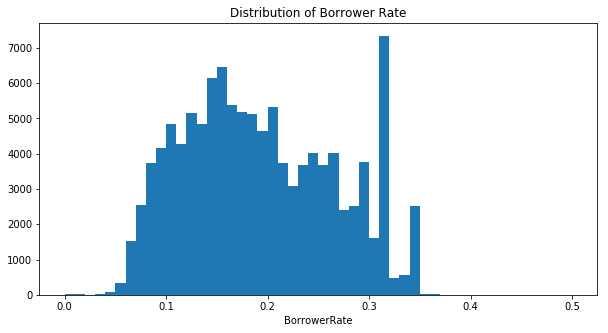

In [33]:
# let's have a look at the distribution of the borrower rate.# 
plt.figure(figsize=[10,5])
binsize = 0.01
bins = np.arange(0, loan_clean['BorrowerRate'].max()+binsize, binsize)

plt.hist(data = loan_clean, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.title('Distribution of Borrower Rate');

Borrower rate has a normal distributions with slightly right-skewed except for there are two peaks around 0.32 and 0.35. Let's narrow the limit a little bit and have a closer look of the distirbution between 0 and 0.4.

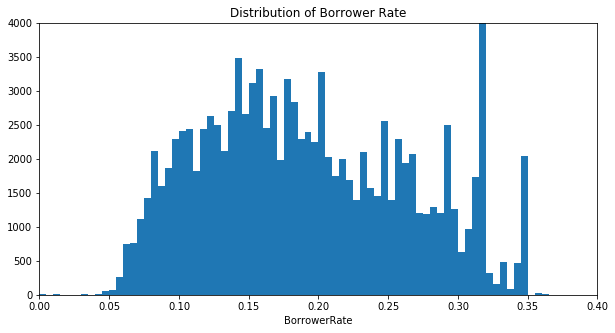

In [34]:
plt.figure(figsize=[10,5])
binsize = 0.005
bins = np.arange(0, loan_clean['BorrowerRate'].max()+binsize, binsize)
plt.xlim(0,0.4)
plt.ylim(0,4000)
plt.hist(data = loan_clean, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.title('Distribution of Borrower Rate');

Most of the main peak of the normal distribution is around 0.15 with another two peaks after 0.30 at around 0.32 and 0.35.

In [35]:
# Now comes to the ListingCategory and LoanStatus.
loan_clean['ListingCategory (numeric)'].value_counts()

1     57624
0     16965
7     10448
2      7388
3      7157
6      2568
4      2395
13     1987
15     1507
18      882
14      863
19      764
20      762
5       756
16      304
11      214
8       196
10       91
9        85
12       58
17       52
Name: ListingCategory (numeric), dtype: int64

In [36]:
loan_clean.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

- Top three reasons why people borrow money through Prosper are Debt Consolidation, Home improvement and Business.(_0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 7- Other_)
- Loan Status: I'm surprisingly to find out that lots of people cannot pay back the loan in time. Many of them are delaying, charged-off or even defaulted.


Thus i'd like to have a further look at loan status by filtering the status into "Good:1" and "Bad:0".

In [37]:
loan_clean['Result'] = np.where(loan_clean['LoanStatus'].isin(['Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)']), 0, 1)

In [38]:
loan_clean.Result.value_counts()

1    93999
0    19067
Name: Result, dtype: int64

We consider the status who are charged off, defaulted and past due as "Bad" results. The rest are "Good" results.  
According to the value_counts above, in every six loans, there is a "Bad" result. Later we will find out what factors affect a loan’s outcome status.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The Prosper Rating was concentrated between D to B (middle-level rates). However, nowadays the proportion of AA is very low, which indicates AA may have a strong connection to the borrowing rate or amount. That's why it's so strict to get a AA now.
- There are 12.9% of the loan records came from California(CA) which is much higher than the rest of the states.
- Employment status: most of the borrowers are employed and have a full-time job.
- The top three occupations here are Computer Programmer, executive, and teacher.
- The distribution of loan amount has lots of peaks which are concentrated near 5000, 10000, 15000, 20000, 25000, 30000 and 35000.
- Borrower rate has a normal distribution with slightly right-skewed except for there are two peaks around 0.32 and 0.35.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- There are too many states included. I filtered the states that have more than 2000 records.
- Filtered the time by adding a new column _'month_year'.
-  I'm surprised to find out that lots of people cannot pay back the loan in time. Many of them are delaying, charged-off or even defaulted. To have a further look at loan status, I filter the loan status into "Good" and "Bad", which is also easier for us to analyze what factors affect a loan’s outcome status.

<a id='eda'></a>
## Bivariate Exploration


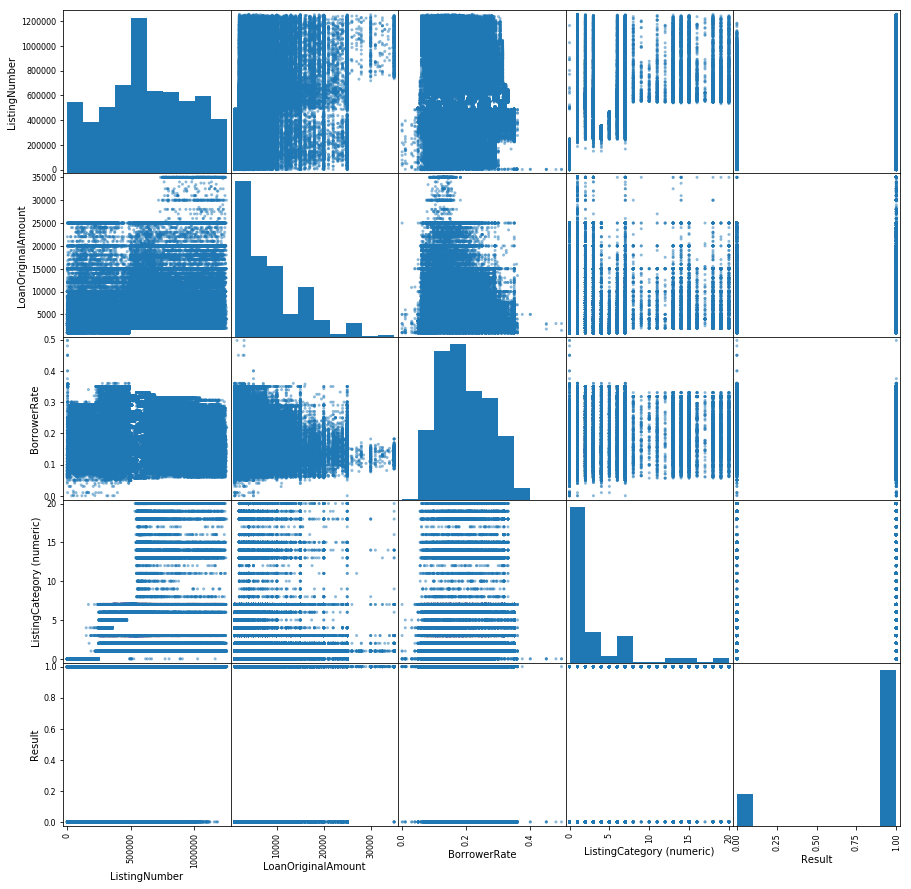

In [39]:
# First, have a look at the pairwise correlations present between features in the data.
pd.plotting.scatter_matrix(loan_clean, figsize=(15,15));

As is shown above, it's not difficult to find that borrower rate is correlated with loan amount.

In this section, I'm going to investigate **the relationship between**:  

- CreditGrade/ProsperRating **and**<br>
  1.LoanOriginalAmount<br>
  2.BorrowerRate<br> 
  3.Result<br>
<br>  
- BorrowerRate **and**<br>
  1.CreditGrade/ProsperRating<br>
  2.LoanOriginalAmount<br>
<br>  
 
_*Five relationships_

First have a look at how did CreditGrade influence the other factors.

In [40]:
sub_loan_clean = loan_clean.groupby('CreditGrade').mean().reset_index()
sub_loan_clean

,CreditGrade,ListingNumber,LoanOriginalAmount,BorrowerRate,ListingCategory (numeric),Result
0,HR,149980.793330,2453.612885,0.255509,0.744299,0.391961
1,E,158874.306780,3391.941320,0.255756,0.825175,0.510185
2,D,202726.111197,4785.527460,0.211915,1.156996,0.606637
3,C,216353.193309,6100.663480,0.179671,1.284652,0.639051
4,B,225600.701071,8313.081340,0.153568,1.351561,0.680565
5,A,223024.460332,9292.163801,0.125080,1.382202,0.755958
6,AA,221444.362211,9144.065831,0.098063,1.584497,0.846110


I want to see the relationship between CreditGrade and "BorrowerRate, LoanOriginalAmount and Result" those three factors.   
To make things simpler, I will create a function.

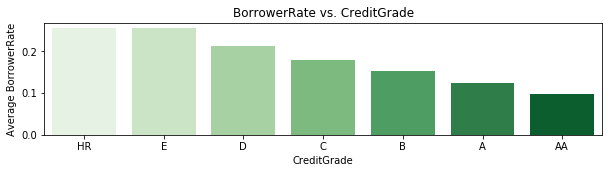

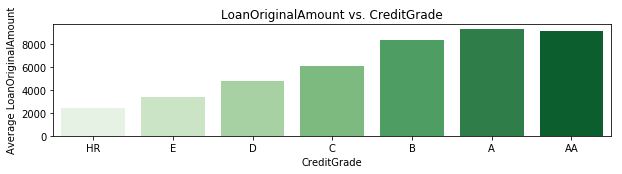

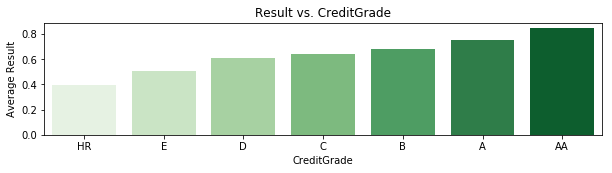

In [41]:
def CreditGrade_vs(number,factor):
    plt.figure(figsize=[10,7])
    plt.subplot(3,1,number)
    sb.barplot(data = sub_loan_clean, x = 'CreditGrade', y = factor, palette = 'Greens')
    plt.title('{} vs. CreditGrade'.format(factor));
    plt.ylabel("Average {}".format(factor))
    return plt.show()

CreditGrade_vs(1,'BorrowerRate'),
CreditGrade_vs(2,'LoanOriginalAmount'),
CreditGrade_vs(3,'Result')

As was clearly shown above, loan amount and result both have a positive correlation with the creditGrade, while 
borrower rate has a negative correlation with the creditGrade. This is before the 2009.07, but i believe after 2009, the result is the same:

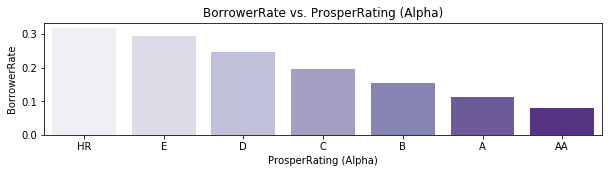

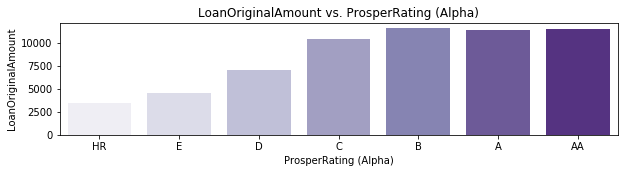

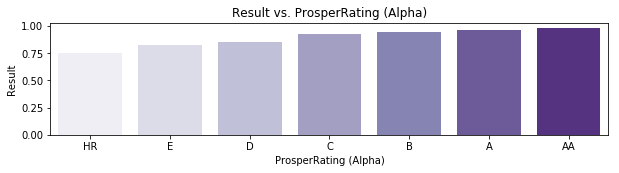

In [42]:
sub_loan_clean1 = loan_clean.groupby('ProsperRating (Alpha)').mean().reset_index()

def CreditGrade_vs(number,factor):
    plt.figure(figsize=[10,7])
    plt.subplot(3,1,number)
    sb.barplot(data = sub_loan_clean1, x = 'ProsperRating (Alpha)', y = factor, palette = 'Purples')
    plt.title('{} vs. ProsperRating (Alpha)'.format(factor));
    return plt.show()

CreditGrade_vs(1,'BorrowerRate'),
CreditGrade_vs(2,'LoanOriginalAmount'),
CreditGrade_vs(3,'Result')

Although basically, the correlation between ProsperRating and those three variables are the same. There are two things i found interesting:   
1.Compared to the previous time, the current Prosper Rating has a stronger impact on the borrower rates, and the average borrower rates is much smaller on level AA.  
2.Compared to the previous time, the result now is much better, the good result is around 75% even if it's the lowest Prosper Rating.

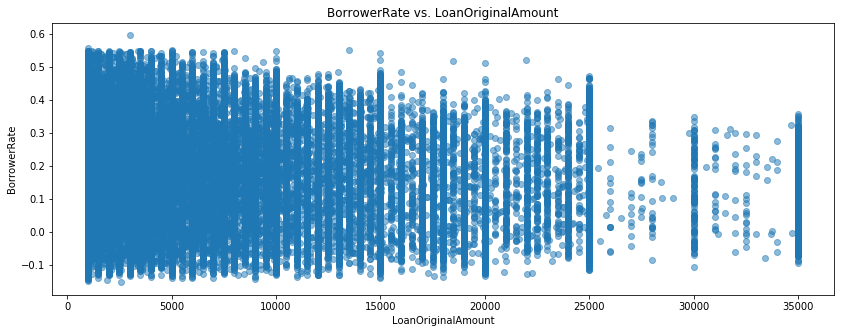

In [43]:
# BorrowerRate vs. LoanOriginalAmount
plt.figure(figsize=[14,5])
sb.regplot(data = loan_clean, x = 'LoanOriginalAmount', y = 'BorrowerRate', fit_reg = False, x_jitter = 0.2,
           y_jitter = 0.2, scatter_kws = {'alpha' : 1/2});
plt.title('BorrowerRate vs. LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount');

As the loan amount increases, the maximum value of borrower rates gradually decreases from around 0.57 to 0.37.

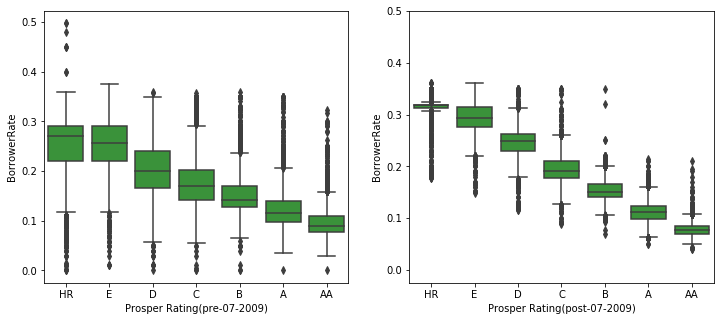

In [44]:
# BorrowerRate vs. CreditGrade/ProsperRating
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
base_color = sb.color_palette()[2]
sb.boxplot(data = loan_clean, x = 'CreditGrade', y = 'BorrowerRate', color = base_color);
plt.xlabel('Prosper Rating(pre-07-2009)');

plt.subplot(1,2,2)
base_color = sb.color_palette()[2]
sb.boxplot(data = loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', color = base_color)
plt.xlabel('Prosper Rating(post-07-2009)')
plt.ylim(-0.025,0.5);


As we was expected, the borrower rate decreases as Prosper rating increases.   
Compared with pre-2009, the borrower rate range for each Prosper rating has been more accurate. On the other hand, the division between different ratings is clearer and the difference is bigger, indicating that the classification is more strict and more complete.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- Loan amount and result both have a positive correlation with the creditGrade, while borrower rate has a negative correlation with the creditGrade. 
- As the loan amount increases, the maximum value of borrower rates gradually decreases from around 0.57 to 0.37.
- The borrower rate decreases as Prosper rating increases.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It's interesting to see that many things changed with time passing by. **Compared with pre-2009** : 
1. The borrower rate range for each Prosper rating has been more accurate. On the other hand, the division of borrower rates between different ratings is clearer and the difference is bigger, indicating that the classification is more strict and more complete.
2. The current Prosper Rating has a stronger impact on the borrower rate, and the average borrower rate is much smaller on level AA.
3. The results are much better, the good results is around 75% even if it has the  the lowest Prosper Rating.


<a id='Multivariate'></a>
## Multivariate Exploration

Let's explore how does rating influence the LoanOriginalAmount and borrower rate.

<Figure size 432x360 with 0 Axes>

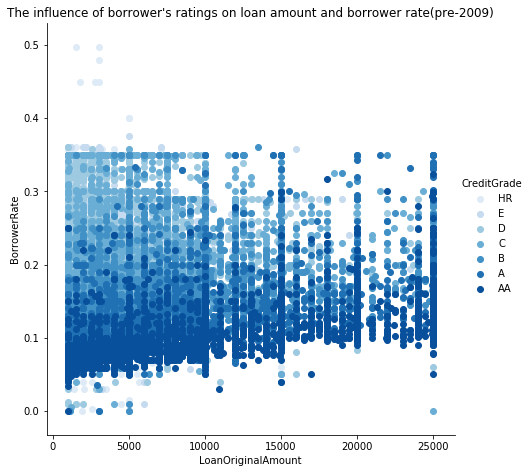

In [45]:
plt.figure(figsize=[6,5])
g = sb.FacetGrid(data = loan_clean, hue = 'CreditGrade', palette = 'Blues', size = 6.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
plt.title("The influence of borrower's ratings on loan amount and borrower rate(pre-2009)")
g.add_legend();

Before July 2009, actually the borrowing rate is **not** really as expected : decrease as the loan amount increase.
While the credit grade still effects a lot on the borrowing rate.

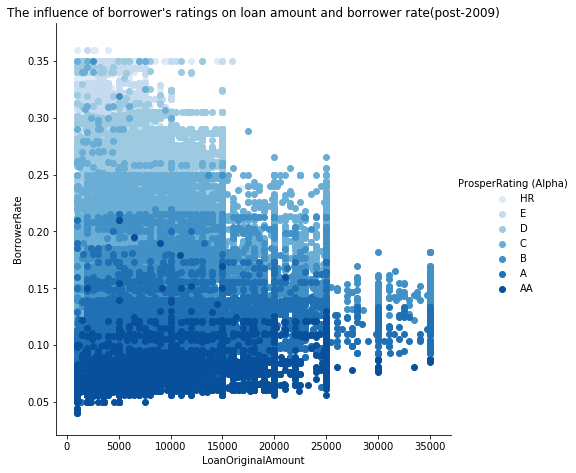

In [46]:
g = sb.FacetGrid(data = loan_clean, hue = 'ProsperRating (Alpha)', palette = 'Blues', size = 6.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
plt.title("The influence of borrower's ratings on loan amount and borrower rate(post-2009)")
g.add_legend();

After July 2009, borrower rate significantly decreases as the loan amount increases while rating plays a bigger role in borrower rate that with a high rating can people get a really low borrower rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Before July 2009, actually the borrowing rate is not really as expected : decrease as the loan amount increase. While the credit grade still effects a lot on the borrowing rate. After July 2009, borrower rate significantly decreases as the loan amount increases while rating plays a bigger role in borrower rate that with a high rating can people get a really low borrower rate.

### Were there any interesting or surprising interactions between feature?
Time plays a very crucial roles in the relationship between borrower rate, loan amount and credit rating.
It is very interesting that nowadays credit rating actually plays a very important role in our life. With a high standard credit evaluation system, you can borrow a lot of money with a very low borrowing rate. The original dataset has more than 80 variables, although in this project I mainly focused on how credit rating influence the loan, maybe later we can explore how credit rating is affected by other factors.